# Redes Neuronales 2020
## FAMAF, UNC
### Práctico 1

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from autoclass import autoargs

sns.set_style("darkgrid")

El sistema de dos ecuaciones diferenciales ordinarias definido como:

$$ \dot{C}(t)  = \alpha C(t) - \beta C(t) Z(t) $$

$$ \dot{Z}(t) = -\gamma Z(t) + \delta C(t) Z(t) $$

Es conocido como **Modelo de predadores y prezas de Lotka-Volterra**. La función $C(t)$ modela el número de conejos en un ecosistema dado, y $Z(t)$ la cantidad de zorros del mismo ecosistema.

Comenzamos por definir una clase para manejar el modelo, tomando como parámetros los índices de crecimiento:

In [2]:


class LotkaVolterraModel:
    """
    Lotka-Volterra model as a pair of first-order,
    nonlinear, differential equations.
    Notice the notation: `dF_dx -> F Derivative over x`
    Also, the growth functions will take a pair as parameter,
    corresponding with the current count of prey/predators.

    Attributes:
        float alpha: Prey birth rate
        float delta: Prey death rate
        float gamma: Depredator birth rate
        float delta: Depredator death rate
        func dP_dt: Prey growth function
        func dD_dt: Depretador growth function
    """

    @autoargs
    def __init__(self, alpha, beta, gamma, delta):
        # define functions
        self.dP_dt = lambda p, d: (alpha * p) - (beta * p * d)
        self.dD_dt = lambda p, d: (delta * p * d) - (gamma * d)
    
    """
    Eval the model over a specific count of prey/predators.
    Parameters:
        indexable count: Array where [0] is prey count, [1] is predator count
        float t: represents time (unused for this model)
    Returns:
        np.array(2, np.float32): Growth functions in the given points.
    """
    def __call__(self, count, t=None):
        return np.array((
            self.dP_dt(count[0], count[1]), 
            self.dD_dt(count[0], count[1])
        ), np.float32)



Ahora podemos inicializar el modelo con los índices dados, y hacemos una verificación rápida, probando evaluar el crecimiento de las presas y sus predadores utilizando un valor inicial de 0 para ambos:

In [3]:
lotkaVolterra = LotkaVolterraModel(
    alpha=1.0,
    beta=0.1,
    gamma=1.5,
    delta=0.75
)

print(f"""
El crecimiento cuando no existen presas ni predadores es: 
{lotkaVolterra((0, 0))}
""")


El crecimiento cuando no existen presas ni predadores es: 
[0. 0.]



Vemos que el resultado es el esperado, no hubo crecimiento ya que no había ni presas ni predadores.

Ahora, vamos a buscar graficar el flujo de crecimiento de estos valores a través del tiempo, dados los índices de crecimiento/muerte dados y de unos valores iniciales elegidos por nosotros. Para lograr esto, vamos a implementar el método de Runge-Kutta de cuarto orden, que nos va a permitir encontrar una aproximación a la solución de la ecuación.

In [4]:


"""
Runge-Kutta4 Algorithm.
Parameters:
    callable model: Model to evaluate each step
    (float, float) initial: Initial point
    int max_x: X value for which the algorithm will stop
    float h: Step that should be taken on each iteration (default: 0.5)
Returns:
    np.array(np.float32) X: Used x points
    np.array(np.float32) Y: Used y points
    np.array(np.float32) T: Used time points
"""
def rungeKutta4(model, initial, max_x, h=0.5):
    # initialize points
    T = np.arange(0, max_x, h, np.float32)

    # initialize helpers and result
    x, y = initial
    r = np.array([x, y], np.float32)
    X, Y = np.array([], np.float32), np.array([], np.float32)

    # iterate
    for t in T:
        # update points
        X = np.append(X, r[0])
        Y = np.append(Y, r[1])

        # runge-kutta step
        k1 = h * model(r, t)
        k2 = h * model((r + 0.5 * k1), t + 0.5 * h)
        k3 = h * model((r + 0.5 * k2), t + 0.5 * h)
        k4 = h * model((r + k3), t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4)/6

    return X, Y, T


Ahora que tenemos definido el algoritmo, vamos a probar, comenzando por un punto (2, 3) y un step de 0.5.
Luego vamos a graficar los resultados:

In [5]:
X, Y, T = rungeKutta4(
    lotkaVolterra,
    initial=(2, 3),
    max_x=200
)

X.shape, Y.shape, T.shape

((400,), (400,), (400,))

Ahora podemos graficar los puntos obtenidos para ver el comportamiento a través del tiempo:

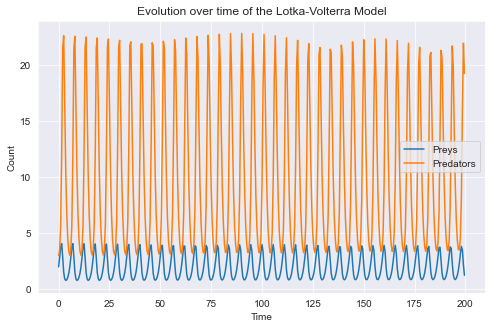

In [6]:
f, ax = plt.subplots(1, figsize=(8, 5))
ax.plot(T, X, label='Preys')
ax.plot(T, Y, label='Predators')
ax.set_title('Evolution over time of the Lotka-Volterra Model')
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.legend()
plt.show()